In [3]:
#Install category encoder just in casse, but for this data set we don't have categorical features. We will drop if there any.
!pip install category_encoders==2.*

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 2.0 MB/s eta 0:00:00


In [2]:
# it is good practice to use ydata_profiling to overview of data description. It gives usefull graphical abstract of all features and data distributions.
!pip install ydata-profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 359.5/359.5 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 4.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 8.0 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27080 sha256=ee5d5f8dc1dc5e9cbd4daa1dd79216660e6c512619c80a8a50f50809bd8735ce
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


In [4]:
#we will use xgb class of this module later on for feature boosting
!pip install eli5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 4.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107720 sha256=95c705c0ae6fc5c1f118fafda49c93613605735441e5404f36b835fe948b0483
  Stored in directory: /root/.cache/pip/wheels/b8/58/ef/2cf4c306898c2338d51540e0922c8e0d6028e07007085c0004
Successfully built eli5


In [5]:
!pip install PDPbox

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.8/35.8 MB 23.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 28.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 22.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.1/121.1 kB 4.9 MB/s eta 0:00:00
  Attempting uninstall: sphinx
    Found existing installation: Sphinx 5.0.2
    Uninstalling Sphinx-5.0.2:
      Successfully uninstalled Sphinx-5.0.2


In [6]:
# we need most of this libraries and modules but not all
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from category_encoders import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from ydata_profiling import ProfileReport
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
import eli5
from eli5.sklearn import PermutationImportance
from pdpbox.pdp import PDPIsolate, PDPInteract
from pdpbox.info_plots import TargetPlot, InteractTargetPlot
import matplotlib.pyplot as plt


In [7]:
#I will use data from my neurobiology. Thes data is for predicting the psychosis behaviour of animal (rat) modele of parkinonians rodent modele. lab expected working on google.colab environement and
from google.colab import files
uploaded = files.upload()

Saving Rat psychosis.csv to Rat psychosis.csv


In [8]:
import io
df = pd.read_csv(io.BytesIO(uploaded['Rat psychosis.csv']))
df.head()

,Source.Name,Treatment,Rat_ID,Code_ID,time,Still,H-up,H-d,H-S,OF,Groom,CPD,Sum_score
0,Clz(5mgkg) rat AV Psychosis Scoring sheet 133...,Clz,AV,1337,Average,0.20,0.0,0,0.00,0.08,0.06,0.20,0.54
1,Clz(5mgkg) rat AZ Psychosis Scoring sheet 113...,Clz,AZ,1139,Average,1.58,0.0,0,0.04,0.10,0.00,0.44,2.16
2,Clz(5mgkg) rat AV Psychosis Scoring sheet 1142...,Clz,AV,1142,Average,0.00,0.0,0,0.00,0.20,0.06,2.70,2.96
3,Clz(5mgkg) rat AZ Psychosis Scoring sheet 1312...,Clz,AZ,1312,Average,0.00,0.0,0,0.08,0.10,0.00,2.90,3.08
4,IRL (3mgkg) Rat AO Psychosis Scoring sheet 135...,IRL(3mg/kg),AO,1359,Average,0.40,0.5,0,0.16,0.20,0.00,0.20,1.46


In [9]:
df.columns

Index(['Source.Name', 'Treatment', 'Rat_ID', 'Code_ID', 'time', 'Still',
       'H-up', 'H-d', 'H-S', 'OF', 'Groom', 'CPD', 'Sum_score'],
      dtype='object')

In [10]:
#We drop ssome of columns since we have many zeros on this columns. Note, here zeros doesn't mean NaN value, Zeros means that experimenter haven't seen any relative beahviour.Also we dropb unnecessary descriptive columns.
features_for_drop= ['H-d','Source.Name', 'Treatment', 'Rat_ID', 'Code_ID', 'time']

In [11]:
df=df.drop(columns=features_for_drop)

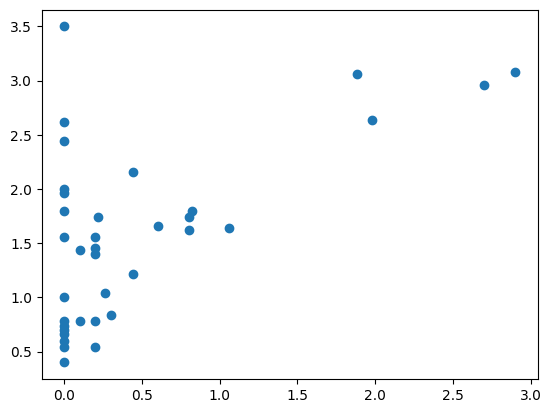

In [12]:
plt.scatter(df['CPD'], df['Sum_score'])

In [13]:
df.head()

,Still,H-up,H-S,OF,Groom,CPD,Sum_score
0,0.20,0.0,0.00,0.08,0.06,0.20,0.54
1,1.58,0.0,0.04,0.10,0.00,0.44,2.16
2,0.00,0.0,0.00,0.20,0.06,2.70,2.96
3,0.00,0.0,0.08,0.10,0.00,2.90,3.08
4,0.40,0.5,0.16,0.20,0.00,0.20,1.46


In [122]:
#from ydata_profiling import ProfileReport. As we can we have some correlated features and skewed data features. We will try to drop or adjust them while we doing EDA.
profile= ProfileReport(df)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [14]:
#determining our feature matrix and target vector
target='Sum_score'
X= df.drop(columns=target)
y=df[target]

In [15]:
#checking the dimension of fm and tv
X.shape, y.shape

((36, 6), (36,))

In [16]:
#spliting training and test data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [166]:
X_test

,Still,H-up,H-S,OF,Groom,CPD
35,1.10,0.06,0.04,0.10,0.22,0.22
13,0.52,0.30,0.20,0.44,0.10,0.00
26,0.66,0.26,0.00,0.88,0.00,0.00
30,0.00,0.76,1.40,0.46,0.00,0.00
16,0.10,0.72,0.00,0.36,0.00,1.88
31,0.22,0.00,0.12,0.06,0.00,0.00
21,0.00,0.00,0.22,0.22,0.22,0.00
12,0.10,0.00,0.04,0.64,0.00,0.00
8,0.24,0.00,0.00,0.70,0.00,0.80


In [17]:
#first we model the linear regrssion
model_lr = make_pipeline(
    SimpleImputer(),
    StandardScaler(),
    LinearRegression())
model_lr.fit(X_train, y_train)

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [18]:
#it seems a lot over fitting happens for training
training_acc= model_lr.score(X_train, y_train)
val_acc=model_lr.score(X_test, y_test)
print('training_acc:',  training_acc)
print('val_acc:' , val_acc)

training_acc: 1.0
val_acc: 1.0


In [19]:
#Let's check ridge if any improvement for the model
model_lrr = make_pipeline(
    SimpleImputer(),
    StandardScaler(),
    Ridge())
model_lrr.fit(X_train, y_train)

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler()), ('ridge', Ridge())])

In [20]:
#it looks there is some imrovment from overfitting
training_acc= model_lrr.score(X_train, y_train)
val_acc=model_lrr.score(X_test, y_test)
print('training_acc:',  training_acc)
print('val_acc:' , val_acc)

training_acc: 0.9967073308539526
val_acc: 0.9932970629759676


In [22]:
# Define the binary class for classification
y_train_encoded = (y_train > 1).astype(int)
y_test_encoded = (y_test > 1).astype(int)

In [23]:
#Stablishing the baseline for the classification models
y_train_encoded.value_counts(normalize=True).max()

0.6666666666666666

In [24]:
#first we use simple decision tree classifier
model_dt= make_pipeline(

    DecisionTreeClassifier( max_depth=3)
)
model_dt.fit(X_train, y_train_encoded)

Pipeline(steps=[('decisiontreeclassifier',
                 DecisionTreeClassifier(max_depth=3))])

In [25]:
training_acc= model_dt.score(X_train, y_train_encoded)
val_acc=model_dt.score(X_test, y_test_encoded)
print('training_acc:',  training_acc)
print('test_acc:' , val_acc)

training_acc: 1.0
test_acc: 0.7777777777777778


In [26]:
#next we run the ensamble classifier with lower depth since it very prone to getting overfitting
model_rf= RandomForestClassifier(n_estimators=75, max_depth=5)

model_rf.fit(X_train, y_train_encoded)

RandomForestClassifier(max_depth=5, n_estimators=75)

In [27]:
#there is some improvement for accuracy but like
training_acc= model_rf.score(X_train, y_train_encoded)
val_acc=model_rf.score(X_test, y_test_encoded)
print('training_acc:',  training_acc)
print('test_acc:' , val_acc)

training_acc: 1.0
test_acc: 0.8888888888888888


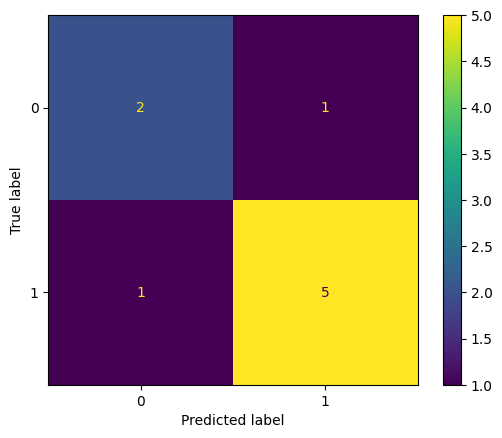

In [28]:
#since our class tend to be imbalanced we did confusion matrix
ConfusionMatrixDisplay.from_estimator(model_dt, X_test, y_test_encoded)

In [29]:
#just for show feature importance we ran boosting models
model_xgb= make_pipeline(
    StandardScaler(),
    SimpleImputer(strategy= 'mean'),
    XGBClassifier(random_state=42, n_estimators=10, n_jobs=-1)
)
model_xgb.fit(X_train, y_train_encoded)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('simpleimputer', SimpleImputer()),
                ('xgbclassifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=10, n_jobs=-1,
                               num_parallel_tree=None, random_state=42, ...))])

<Axes: >

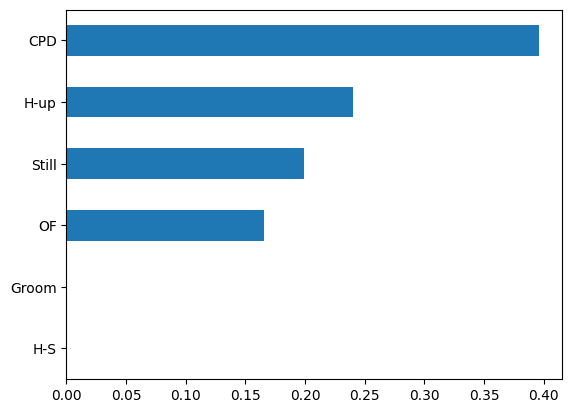

In [30]:
#then we drew the feature importance plot
importances= model_xgb.named_steps['xgbclassifier'].feature_importances_
feature_names=X_train.columns
feat_imp=pd.Series(data=importances, index= feature_names).sort_values()
feat_imp.tail(10).plot(kind='barh')

In [31]:
training_acc= model_xgb.score(X_train, y_train_encoded)
val_acc=model_xgb.score(X_test, y_test_encoded)
print('training_acc:',  training_acc)
print('test_acc:' , val_acc)

training_acc: 1.0
test_acc: 0.7777777777777778


In [32]:
# for dive deep specifically on feature importance we used permutaion method of elif module
perm = PermutationImportance(model_xgb, random_state=1).fit(X_test, y_test_encoded)

In [33]:
#now it shows that of is more critical for model prediction
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Weight,Feature
0.1111 ± 0.1988,OF
0.0889 ± 0.1663,H-up
0.0667 ± 0.1089,Still
0.0222 ± 0.0889,CPD
0 ± 0.0000,Groom
0 ± 0.0000,H-S


In [ ]:
'''Now her we explore partial dependency graph of one of our data feature'''
from pdpbox.pdp import PDPIsolate, PDPInteract
from pdpbox.info_plots import TargetPlot, InteractTargetPlot

In [36]:
pdp_isolate = PDPIsolate
pdp_plot = TargetPlot
pdp_interact = PDPInteract
pdp_interact_plot = InteractTargetPlot

In [37]:
sample_feature= 'CPD'

isolate = pdp_isolate(
    model=model_xgb,
    df= X_test,
    model_features= X_test.columns,
    feature=sample_feature,
    feature_name= 'CPD',
    n_classes=2
)

obtain pred_func from the provided model.


  0%|          | 0/5 [00:00<?, ?it/s]

In [38]:
fig, axes = isolate.plot()
fig

In [39]:
#As final explore here we check the shap
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 8.3 MB/s eta 0:00:00


In [44]:
# We try the Shap here
import shap
sample_row= X_test.tail(1)
shap_ex = shap.TreeExplainer(model_rf)

# Determine Shap values
shap_values = explainer.shap_values(sample_row)

shap.initjs()
shap.plots.force(explainer.expected_value[0], shap_values[..., 0],
    features=sample_row

)
